In [33]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

In [34]:
max_features = 10000 
maxlen = 500  
batch_size = 32

In [35]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [36]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [37]:
model = Sequential()

model.add(Embedding(max_features, 32))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 29s 205ms/step - loss: 0.6327 - acc: 0.6302 - val_loss: 0.4873 - val_acc: 0.7929
Epoch 2/5
137/137 [==============================] - 27s 200ms/step - loss: 0.4002 - acc: 0.8327 - val_loss: 0.3625 - val_acc: 0.8481
Epoch 3/5
137/137 [==============================] - 27s 198ms/step - loss: 0.2968 - acc: 0.8839 - val_loss: 0.3131 - val_acc: 0.8677
Epoch 4/5
137/137 [==============================] - 28s 203ms/step - loss: 0.2471 - acc: 0.9065 - val_loss: 0.3225 - val_acc: 0.8751
Epoch 5/5
137/137 [==============================] - 28s 204ms/step - loss: 0.2125 - acc: 0.9240 - val_loss: 0.3150 - val_acc: 0.8841


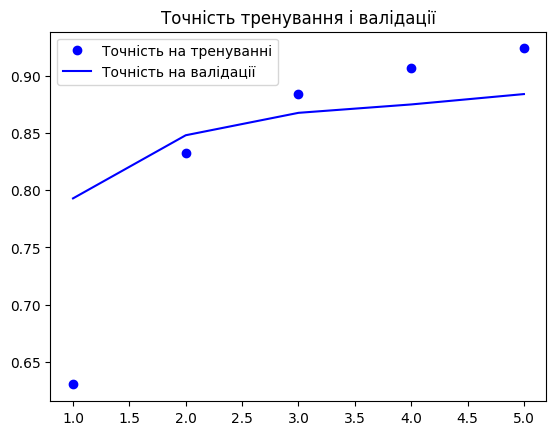

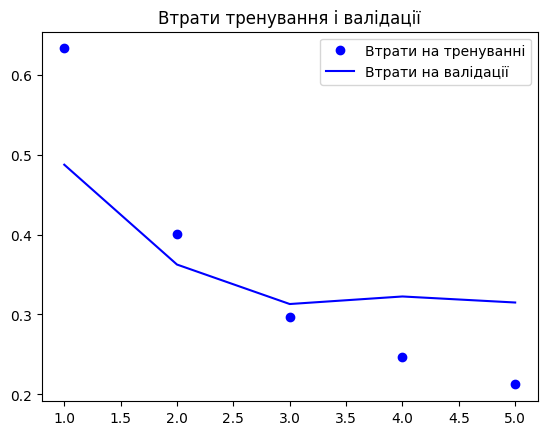

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [42]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 26s 33ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 27s 34ms/step - loss: 0.3412 - acc: 0.8739
Test Loss: 0.3411951959133148
Test Accuracy: 0.8738800287246704


In [43]:
model = Sequential()

model.add(Embedding(max_features, 32))

model.add(Bidirectional(LSTM(32)))

model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 53s 374ms/step - loss: 0.6161 - acc: 0.6515 - val_loss: 0.4687 - val_acc: 0.8143
Epoch 2/5
137/137 [==============================] - 51s 375ms/step - loss: 0.3921 - acc: 0.8371 - val_loss: 0.4790 - val_acc: 0.8020
Epoch 3/5
137/137 [==============================] - 50s 366ms/step - loss: 0.2933 - acc: 0.8873 - val_loss: 0.3134 - val_acc: 0.8724
Epoch 4/5
137/137 [==============================] - 51s 375ms/step - loss: 0.2390 - acc: 0.9111 - val_loss: 0.3310 - val_acc: 0.8573
Epoch 5/5
137/137 [==============================] - 51s 375ms/step - loss: 0.2128 - acc: 0.9228 - val_loss: 0.3171 - val_acc: 0.8835


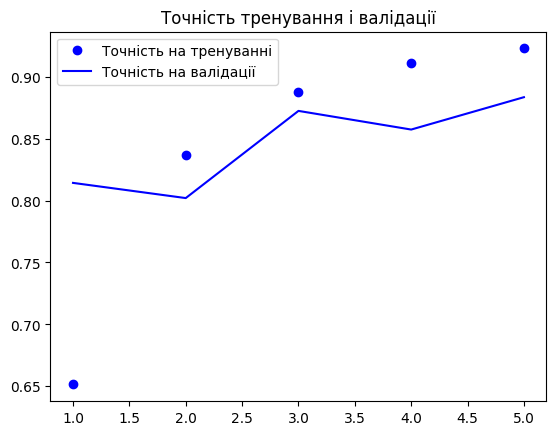

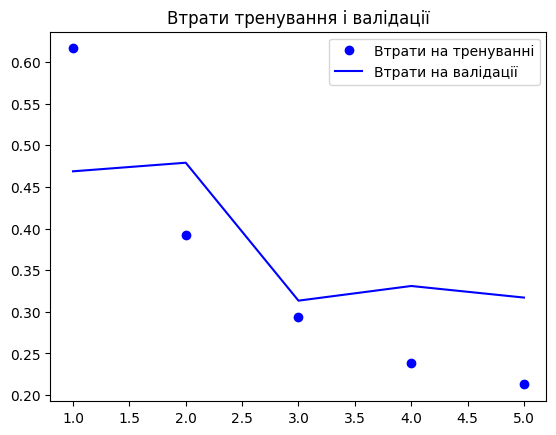

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [48]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 27s 34ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 28s 35ms/step - loss: 0.3357 - acc: 0.8728
Test Loss: 0.33573246002197266
Test Accuracy: 0.8728399872779846


In [49]:
model = Sequential()

model.add(Embedding(max_features, 32))

model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))

model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 162s 1s/step - loss: 0.6362 - acc: 0.6053 - val_loss: 0.4164 - val_acc: 0.8172
Epoch 2/5
137/137 [==============================] - 152s 1s/step - loss: 0.3709 - acc: 0.8428 - val_loss: 0.3915 - val_acc: 0.8413
Epoch 3/5
137/137 [==============================] - 150s 1s/step - loss: 0.2709 - acc: 0.8937 - val_loss: 0.3064 - val_acc: 0.8703
Epoch 4/5
137/137 [==============================] - 151s 1s/step - loss: 0.2176 - acc: 0.9182 - val_loss: 0.2865 - val_acc: 0.8836
Epoch 5/5
137/137 [==============================] - 156s 1s/step - loss: 0.1888 - acc: 0.9348 - val_loss: 0.3290 - val_acc: 0.8817


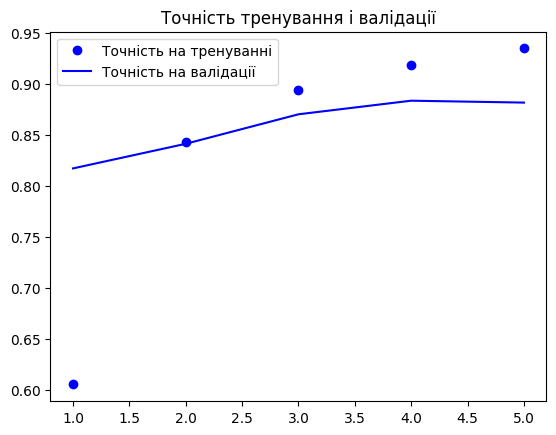

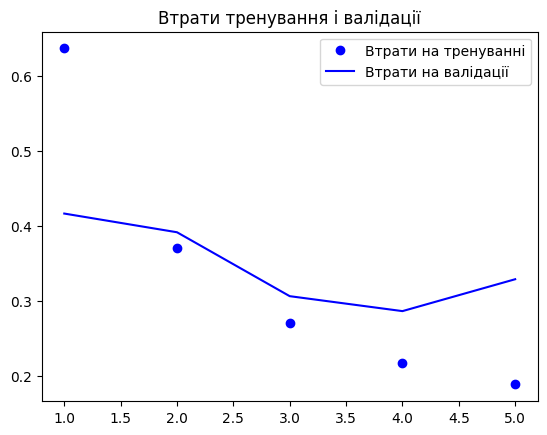

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [54]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 65s 82ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 67s 85ms/step - loss: 0.3548 - acc: 0.8738
Test Loss: 0.35481300950050354
Test Accuracy: 0.8738399744033813
